# Python Pandas  - Análise dos Dados imobiliarios


Este é uma das materias para a formação de Cientista de Dados da Escola Alura.

 Python Pandas tem o foco em tratamento e análise de dados
 
 Este projeto final é exercicio prático do conteudo aprendido.

# Tratamento dos Dados.

## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure',figsize=(8,5))

import warnings 
warnings.filterwarnings('ignore')

##  Importando Base de Dados

In [2]:
dados = pd.read_csv('Dados/aluguel.csv',sep=';')

## Informações Gerais

Conhecendo a base de dados

In [3]:
# Analisando o tipo de dados das variaveis

tipo_de_dados = pd.DataFrame(dados.dtypes,columns=['tipo_dado'])
tipo_de_dados.columns.name='variaveis'
tipo_de_dados

variaveis,tipo_dado
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


### Formato

- No tipo de dados já estão com o formato correto, não é necessário alterar.


## Analisando os Tipos de imóveis

In [4]:
list(dados.Tipo.unique())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

### Tipo de Imóveis

Na base de dados, existem imoveis residenciais misturados com outros tipos.

Será selecionado para estudo apenas os residenciais.

In [5]:
lista_residencial = ['Quitinete','Casa','Apartamento','Casa de Condomínio','Flat','Casa de Vila']

In [6]:
selecao = dados['Tipo'].isin(lista_residencial)

df_aluguel = dados[selecao]
df_aluguel.index=range(df_aluguel.shape[0]) # organizando as linhas do index

##  Identificando e Tratando Dados Faltantes

In [7]:
# Analisando a quantidade de dados nulos por coluna

dados_nulos = pd.DataFrame(df_aluguel.isnull().sum(),columns=['qtd_nulos'])
dados_nulos.columns.name='variaveis'
dados_nulos['% nulos/total'] = round((dados_nulos.qtd_nulos/df_aluguel.shape[0])*100,2)
dados_nulos[dados_nulos['qtd_nulos']>0]

variaveis,qtd_nulos,% nulos/total
Valor,9,0.04
Condominio,1858,8.06
IPTU,6865,29.78


In [8]:
selecao = df_aluguel['Valor'].isnull()
df_aluguel[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
60,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1521,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1715,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2052,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2074,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
5047,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8753,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
9141,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9346,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [9]:
df_aluguel.dropna(subset='Valor',inplace=True) # deletando os valores nulos da coluna Valor
df_aluguel.index = range(df_aluguel.shape[0]) 

In [10]:
# Selecionando os tipos de imoveis que deveriam possuir valor do condominio, mas estão com dados nulos.

selecao = ((df_aluguel['Tipo']=='Apartamento') | (df_aluguel['Tipo']=='Flat')|(df_aluguel['Tipo']=='Quitinete')|(df_aluguel['Tipo']=='Casa de Condomínio')) & (df_aluguel['Condominio'].isnull())

aluguel = df_aluguel[~selecao] # retirando os valores nulos para a nova base de dados

aluguel.index = range(aluguel.shape[0])

In [11]:
# Verificando os tipos de imoveis que possuem dados nulos na coluna Condominio 

list(aluguel[aluguel.Condominio.isnull()]['Tipo'].unique())

['Casa', 'Casa de Vila']

In [12]:
# Preenchendo os valores nulos com 0
aluguel.Condominio.fillna(0, inplace = True)
aluguel.IPTU.fillna(0, inplace = True)

In [13]:
# Verificando se possuem valores nulos.

list(aluguel[aluguel.Condominio.isnull()]['Tipo'].unique())

[]

#  Obtendo dados Complementares

 Agrupando os bairros em regiões para ter uma análise regional dos imóveis.
 
 As informações do limite dos bairros foi disponibilizada pelo https://www.data.rio/

fonte: https://www.data.rio/datasets/PCRJ::limite-de-bairros/explore?location=-22.916601%2C-43.444800%2C10.92

In [14]:
limite_bairros = pd.read_csv('Dados/Limite_de_Bairros.csv', sep=',')

In [15]:
limite_bairros.drop(['OBJECTID', 'Área', 'AREA_PLANE', 'CODBAIRRO',
                   'CODRA', 'CODBNUM','REGIAO_ADM', 'LINK',  'Cod_RP', 
                    'CODBAIRRO_LONG','SHAPESTArea', 'SHAPESTLength'],
                    axis=1, 
                    inplace = True )

In [16]:
limite_bairros.rename(columns={'NOME':'Bairro','RP':'Regiao'}, inplace = True)

In [17]:
# Retirando os espaços em branco dos str.

limite_bairros['Bairro'] = limite_bairros.Bairro.str.lstrip()
limite_bairros['Bairro'] = limite_bairros.Bairro.str.rstrip()

limite_bairros['Regiao'] = limite_bairros.Regiao.str.lstrip()
limite_bairros['Regiao'] = limite_bairros.Regiao.str.rstrip()

###  Analisando as Bases de Dados

In [18]:
bairros_rio = limite_bairros.Bairro.unique().shape[0]
bairros_rio
print('Quantidade de bairros Rio de Janeiro: ',bairros_rio)

Quantidade de bairros Rio de Janeiro:  164


In [19]:
bairros_aluguel = dados.Bairro.unique().shape[0]
print('Quantidade de bairros imobiliaria: ',bairros_aluguel)

Quantidade de bairros imobiliaria:  162


In [20]:
bairros_encontrados = limite_bairros.Bairro.isin(dados.Bairro).sum()
print('Quantidade de bairros encontrados: ',bairros_encontrados)

Quantidade de bairros encontrados:  144


In [21]:
print('Quantidade de bairros não encontrados: ', bairros_aluguel - bairros_encontrados)

Quantidade de bairros não encontrados:  18


In [22]:
tab_bairros = dados.Bairro.unique()
tab_bairros = pd.DataFrame(tab_bairros)
tab_bairros.rename(columns={0:"Bairro"}, inplace=True)

## Unindo DataFrames



In [23]:
df_bairros = tab_bairros.merge(limite_bairros, on = "Bairro", how = "left")
df_bairros.head(3)

,Bairro,Regiao
0,Copacabana,Zona Sul
1,Jardim Botânico,Zona Sul
2,Barra da Tijuca,Barra da Tijuca


In [24]:
df_bairros[df_bairros.Regiao.isnull()]['Bairro'] # coleta dos bairros sem Regiao 

# Criando um Dicionário para preencher os dados ausentes (busca realizada no Google)

dic_bairros = {'Jardim Oceânico':'Barra da Tijuca',
            'Península':'Barra da Tijuca',
            'Ilha do Governador':'Ilha do Governador',
            'Oswaldo Cruz':'Madureira',
            'Fátima':'Centro',
            'Braz de Pina':'Penha',
            'Arpoador':'Ipanema',
            'Icaraí':'Centro',
            'Largo do Machado':'Zona Sul',
            'Freguesia (Ilha do Governador)':'Ilha do Governador',
            'Turiaçu':'Madureira',
            'Usina':'Tijuca',
            'Cachamorra':'Campo Grande',
            'Rio da Prata':'Campo Grande',
            'Cidade Jardim':'Jacarepaguá',
            'Castelo':'Centro',
            'Cinelândia':'Centro',
            'Itaguaí':'Itaguaí'               
              }


In [25]:
# index dos Valores nulos

df_bairros[df_bairros.Regiao.isnull()]['Regiao'].index

Int64Index([ 20,  22,  42,  55,  58,  61,  98, 103, 116, 131, 132, 137, 138,
            143, 149, 150, 157, 158],
           dtype='int64')

In [26]:
lista_nulos = [ 20,  22,  42,  55,  58,  61,  98, 103, 116, 131, 132, 137, 138, 143, 149, 150, 157, 158]

for valor in range(len(lista_nulos)):
    preencher = df_bairros.Bairro[lista_nulos[valor]]
    df_bairros['Regiao'][lista_nulos[valor]] = dic_bairros[preencher]

In [27]:
print('Quantidade de dados nulos\n',df_bairros.isnull().sum())

Quantidade de dados nulos
 Bairro    0
Regiao    0
dtype: int64


In [28]:
aluguel = aluguel.merge(df_bairros, on='Bairro',how = 'left')
aluguel.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Regiao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Zona Sul
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Zona Sul
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Centro


## Estatistica Descritiva


In [29]:
aluguel.describe().round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,22100.00,22100.00,22100.00,22100.00,22100.00,22100.00,22100.00
mean,2.51,1.30,0.95,136.04,5023.46,1582.94,577.66
std,1.08,13.23,1.13,143.06,32774.53,44238.16,3809.41
min,0.00,0.00,0.00,10.00,100.00,0.00,0.00
25%,2.00,0.00,0.00,65.00,1600.00,535.00,0.00
50%,2.00,1.00,1.00,90.00,2700.00,900.00,128.00
75%,3.00,2.00,1.00,150.00,5500.00,1593.25,373.25
max,14.00,1960.00,14.00,3000.00,4500000.00,6552570.00,450625.00



### Valores

- Existem alguns valores bem maiores que não fazem sentido para base de dados de aluguel, talvez para venda de imóveis. Por isso serão retirados.

## Subgrupos

In [30]:
g_tipos= aluguel.copy()
g_tipos = g_tipos.groupby('Tipo')

g_tipos['Valor'].aggregate(['min','max','count']).rename(columns={'min': 'Mínimo', 'max': 'Máximo','count':'Contagem'})

,Mínimo,Máximo,Contagem
Tipo,,,
Apartamento,100.0,4500000.0,18780
Casa,400.0,60000.0,965
Casa de Condomínio,560.0,800000.0,901
Casa de Vila,380.0,15000.0,249
Flat,890.0,16000.0,433
Quitinete,300.0,5000.0,772


In [31]:
g_tipos['Quartos'].aggregate(['min','max','count']).rename(columns={'min': 'Mínimo', 'max': 'Máximo','count':'Contagem'})

,Mínimo,Máximo,Contagem
Tipo,,,
Apartamento,0,14,18780
Casa,0,14,965
Casa de Condomínio,1,11,901
Casa de Vila,0,6,249
Flat,0,4,433
Quitinete,0,2,772


Temos alguns valores na coluna 'Máximo' que não fazem muito sentido para alocação.

Por exemplo: 
- Apartamento por 4.500.000,00
- Casa de Condomínio por 800.000,00

É possivel que a base de dados possua alguns imoveis que a finalidade seja para venda e não locação.




## Visualização Gráfica 

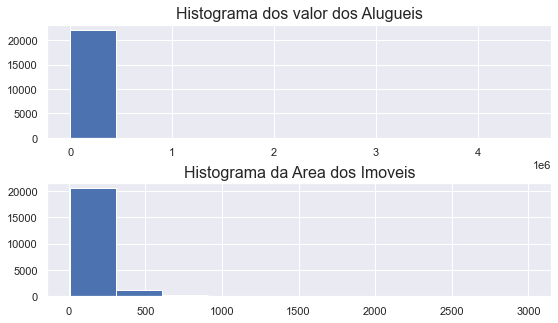

In [32]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.subplot(211)
plt.hist(aluguel['Valor'])
plt.title('Histograma dos valor dos Alugueis',size=16)

plt.subplot(212)
plt.hist(aluguel['Area'])
plt.title('Histograma da Area dos Imoveis',size=16)
plt.subplots_adjust(hspace=.4,right=1)
plt.show()

### Não é possível análisar os dados devido aos Outliers.

Para ter uma analise detalhada, será retirados os outliers


## Removendo Outliers

 Na figura abaixo, mostra a formula do boxplot.
 
 Com base nela, vou retirar os outliers

 <img src='Dados/box-plot.png' width=70%>

In [33]:
valores = aluguel.Valor

q1 = valores.quantile(.25) # separando os 25% dos valores
q3 = valores.quantile(.75)
iiq = q3-q1
out_inf = q1-(iiq*1.5) # Limite Inferior
out_sup = q3+(iiq*1) # Limite Superior

selecao = (valores>=out_inf) & (valores<=out_sup)
dados_new = aluguel[selecao]


In [34]:
areas = aluguel.Area

q1 = areas.quantile(.25) 
q3 = areas.quantile(.75)
iiq = q3-q1
out_inf = q1-(iiq*1.5)
out_sup = q3+(iiq*1)

selecao = (areas>=out_inf) & (areas<=out_sup)
dados_2 = dados_new[selecao]

In [35]:
condominio = dados_2.Condominio

q1 = condominio.quantile(.25) 
q3 = condominio.quantile(.75)
iiq = q3-q1
out_inf = q1-(iiq*1.5)
out_sup = q3+(iiq*1)

selecao = (condominio>=out_inf) & (condominio<=out_sup)
dados_3 = dados_2[selecao]

In [36]:
dados_4 = dados_3[(dados_3.Vagas<6) & (dados_3.Quartos<5)]

iptu = dados_4.IPTU


q1 = iptu.quantile(.25) 
q3 = iptu.quantile(.75)
iiq = q3-q1
out_inf = q1-(iiq*1.5)
out_sup = q3+(iiq*1)

selecao = (iptu>=out_inf) & (iptu<=out_sup)
dados_5 = dados_4[selecao]

In [37]:
iptu = dados_5.IPTU

q1 = iptu.quantile(.25) 
q3 = iptu.quantile(.75)
iiq = q3-q1
out_inf = q1-(iiq*1.5)
out_sup = q3+(iiq*1)

selecao = (iptu>=out_inf) & (iptu<=out_sup)
dados_6 = dados_5[selecao]

aluguel_new = dados_6

### Criando Novas Variáveis para Estudo

In [38]:
aluguel_new['Valor_Bruto'] = (aluguel_new['Valor'] + aluguel_new['Condominio'] + aluguel_new['IPTU'])

In [39]:
aluguel_new['Valor_m2'] = round(aluguel_new['Valor_Bruto']/aluguel_new['Area'],2)

In [40]:
casa = ['Casa','Casa de Condomínio','Casa de Vila']

aluguel_new['Tipo_Agregado'] = aluguel_new['Tipo'].apply(lambda tipo: 'Casa' if tipo in casa else 'Apartamento' )

## Análise Gráfica


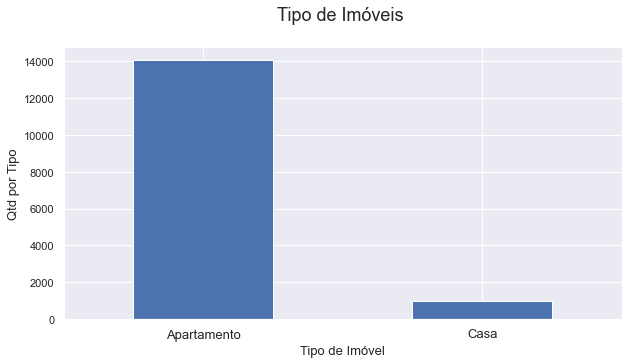

In [41]:
plt.rcParams["figure.figsize"] = (10,5)
aluguel_new.Tipo_Agregado.value_counts().plot.bar()
plt.title('Tipo de Imóveis \n',size=18)
plt.xlabel('Tipo de Imóvel',size=13)
plt.xticks(rotation=0,size=13)
plt.ylabel('Qtd por Tipo',size=13)

plt.show()

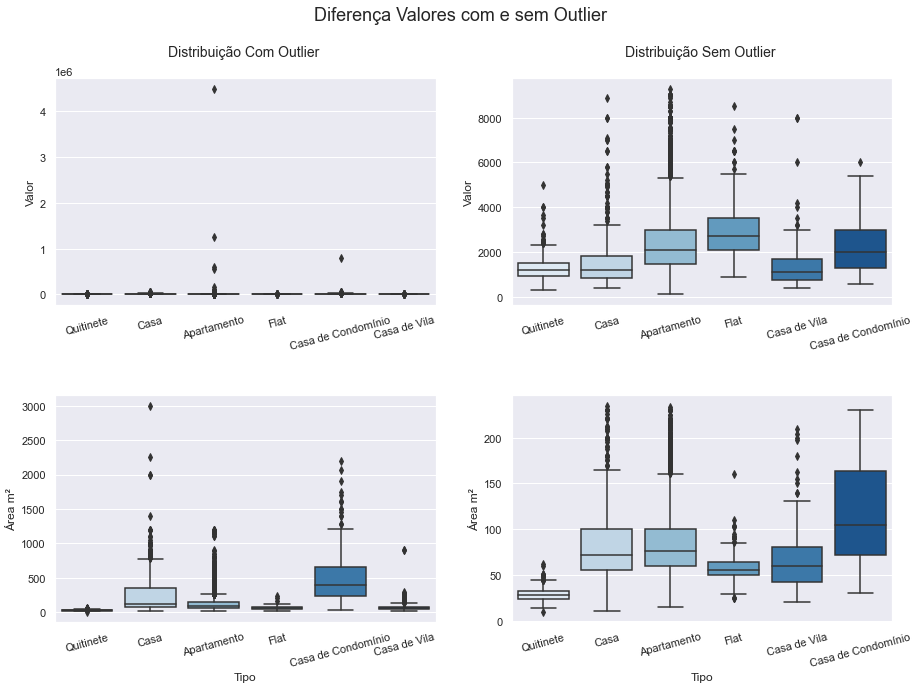

In [42]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


# 1° Figura
label = aluguel.Tipo
valores = aluguel.Valor
sns.boxplot(x=label, y= valores,data=aluguel, ax=ax1,palette = 'Blues')
ax1.set_xticklabels(labels=(label.unique()),rotation=15)
ax1.set_xlabel('')
ax1.set_title('Distribuição Com Outlier \n',size=14)


# 2° Figura
label = aluguel_new.Tipo
valores = aluguel_new.Valor
sns.boxplot(x=label,y=valores,data=aluguel_new,ax=ax2,palette = 'Blues')
ax2.set_xticklabels(labels=(label.unique()),rotation=15)
ax2.set_xlabel('')
ax2.set_title('Distribuição Sem Outlier \n',size=14)


# 3° Figura
label = aluguel.Tipo
valores = aluguel.Area
sns.boxplot(x=label, y= valores,data=aluguel, ax=ax3,palette = 'Blues')
ax3.set_xticklabels(labels=(label.unique()),rotation=15)
ax3.set_ylabel('Área m²')



# 4° Figura
label = aluguel_new.Tipo
valores = aluguel_new.Area
sns.boxplot(x=label, y= valores,data=aluguel_new, ax=ax4,palette = 'Blues')
ax4.set_xticklabels(labels=(label.unique()),rotation=15)
ax4.set_ylabel('Área m²')



fig.suptitle('Diferença Valores com e sem Outlier',size=18)

plt.subplots_adjust(hspace=.4,wspace=.2)

fig.show()

### Sem Outliers
Com a retirada dos outliers, facilita a visualização de como os valores estão distribuidos, tenho um conhecimento mais aprofundado da base de dados.

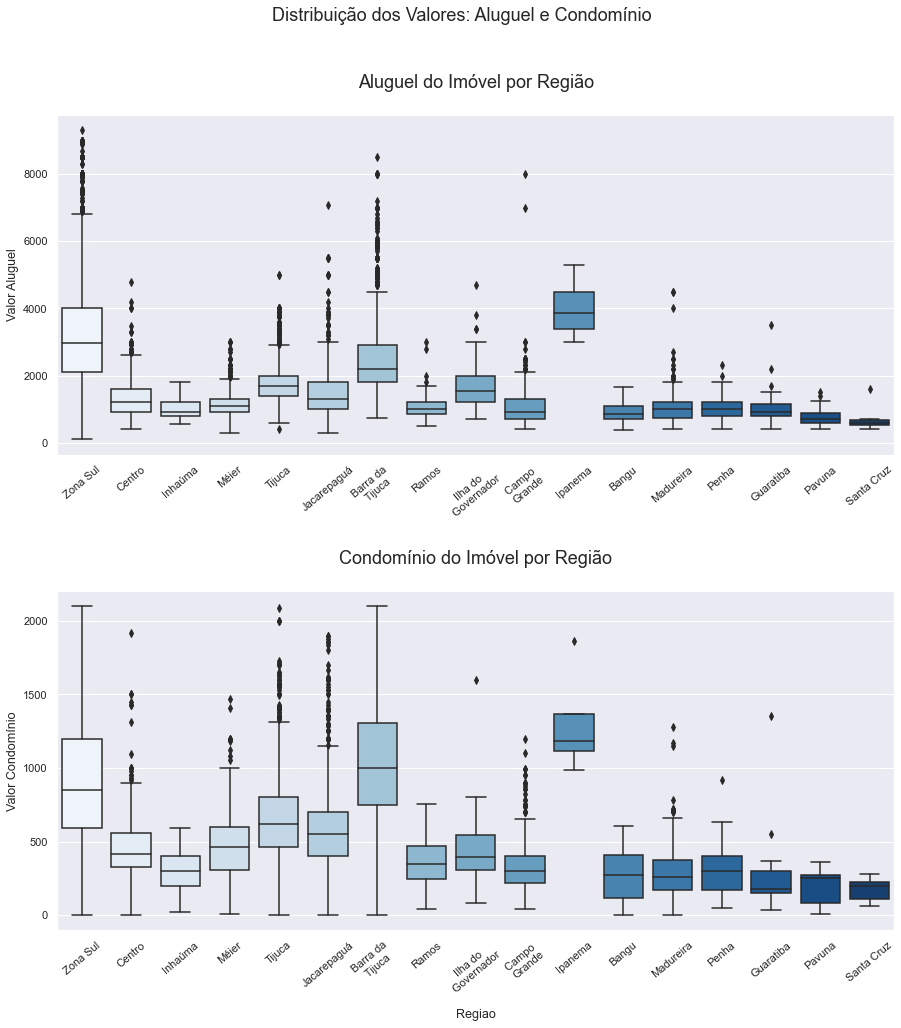

In [43]:
fig = plt.figure(figsize=(15,15))


ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
# ax3 = fig.add_subplot(3,1,3)

txt = ['Zona Sul', 'Centro', 'Inhaúma', 'Méier',
       'Tijuca', 'Jacarepaguá','Barra da\n Tijuca\n', 
       'Ramos', 'Ilha do\n Governador\n', 'Campo \nGrande',
       'Ipanema', 'Bangu', 'Madureira', 'Penha', 'Guaratiba',
       'Pavuna','Santa Cruz']

# 1° Figura
label = aluguel_new.Regiao
valores = aluguel_new.Valor
sns.boxplot(x=label, y= valores,data=aluguel, ax=ax1,palette = 'Blues')
ax1.set_ylabel('Valor Aluguel',size=12.5)
ax1.set_xlabel('')
ax1.set_xticklabels(labels=txt,rotation=40)
ax1.set_title('Aluguel do Imóvel por Região\n',size=18)


# 2° Figura
label = aluguel_new.Regiao
valores = aluguel_new[aluguel_new.Condominio>0]['Condominio']
sns.boxplot(x=label,y=valores,data=aluguel_new,ax=ax2,palette = 'Blues')
ax2.set_ylabel('Valor Condomínio',size=12.5)
ax2.set_xlabel('Regiao',size=12.5)
ax2.set_xticklabels(labels=txt,rotation=40)
ax2.set_title('Condomínio do Imóvel por Região\n',size=18)



fig.suptitle('Distribuição dos Valores: Aluguel e Condomínio',size=18)


plt.subplots_adjust(hspace=0.4)

fig.show()



### Aluguel

- A maioria dos valores dos aluguéis, estão concentrados até 2 mil Reais.<p>

- As regiões com os alugueis mais altos são: Ipanema, Zona Sul e Barra da Tijuca.<p>

- Zona Sul tendo maior variedade de valores.<p>


### Condomínio
    
- A maioria dos valores dos condomínios, estão concentrados até 1 mil Reais.<p>

- As regiões com os condominios mais caros são: Ipanema, Barra da Tijuca e Zona Sul.<p>

- Zona Sul e Barra da Tijuca, são as regiões que tem maior variedade de valores. No entanto, Barra da Tijuca, tem os valores mais elevados.

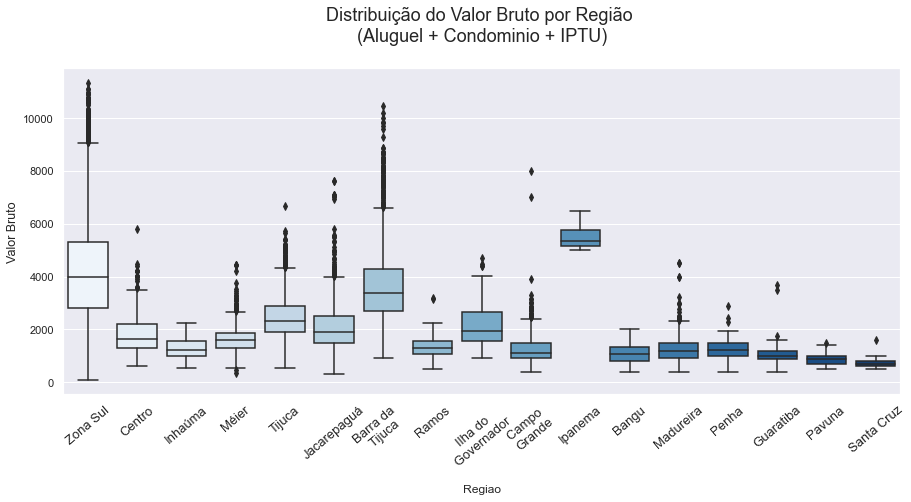

In [44]:
plt.figure(figsize=(15,6))


label= aluguel_new.Regiao
valor = aluguel_new.Valor_Bruto

txt = ['Zona Sul', 'Centro', 'Inhaúma', 'Méier',
       'Tijuca', 'Jacarepaguá','Barra da\n Tijuca\n', 
       'Ramos', 'Ilha do\n Governador\n', 'Campo \nGrande',
       'Ipanema', 'Bangu', 'Madureira', 'Penha', 'Guaratiba',
       'Pavuna','Santa Cruz']


sns.boxplot(label,valor,palette='Blues')

plt.ylabel('Valor Bruto',size=12.5)
plt.xticks(ticks =np.arange(len(txt)), 
           labels = txt, 
           rotation = 40, 
           size = 13)

plt.title('Distribuição do Valor Bruto por Região \n(Aluguel + Condominio + IPTU)\n',
          size=18)

plt.show()



Com a distribuição de valores. É possível tirar alguns insigths:
 - Ipanema é a região mais valorizada, possuindo os imóveis mais caros, acima de 5 mil.
 
 
 - Zona Sul abrange maior variedade nos valores, com imóveis econômicos até os de alto padrão, sendo a segunda região mais valorizada.
 
 
 - Barra da Tijuca é a terceira região mais valorizada.
 
 
 - As demais regiões, o valor total está até 2 mil reais, praticamente.

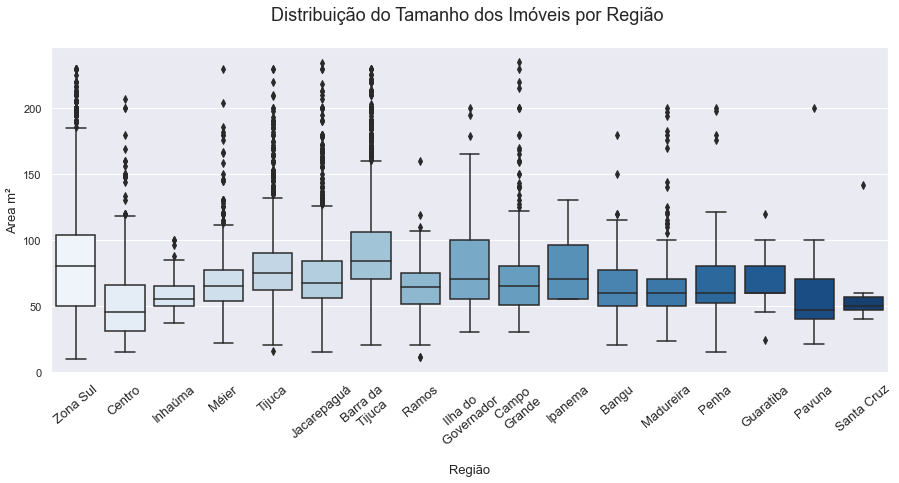

In [45]:
plt.figure(figsize=(15,6))

label= aluguel_new.Regiao
valor = aluguel_new.Area

txt = ['Zona Sul', 'Centro', 'Inhaúma', 'Méier',
       'Tijuca', 'Jacarepaguá','Barra da\n Tijuca\n', 
       'Ramos', 'Ilha do\n Governador\n', 'Campo \nGrande',
       'Ipanema', 'Bangu', 'Madureira', 'Penha', 'Guaratiba',
       'Pavuna','Santa Cruz']

sns.boxplot(label,valor,palette='Blues')

plt.ylabel('Area m²',size=13)
plt.xlabel('Região',size=13)

plt.xticks(ticks =np.arange(len(txt)), 
           labels = txt, 
           rotation = 40, 
           size = 13)

plt.title('Distribuição do Tamanho dos Imóveis por Região \n',size=18)

plt.show()



 - Ipanema é a regiao que possuem imóveis com maior area, imóveis com areas de 60 m² até 200 m²<p>
    
 - Barra da Tijuca, é a que abrange maior variedade de tamanhos, com imóveis de 25 m² até 240 m², sendo a segunda região com maior area de imóvel para locação.<p>
 - Zona Sul possue grade variedade de tamanhos também, e fica em terceiro lugar em tamanho de imóveis para locação.<p>
 - As demais regiões possuem imóveis com tamanho até 100 m². Sendo que a maioria encontra-se entre 50 m² e 100 m².<p>